# Regression Analysis

Suppose you have dataset with cars (CO2_passenger_cars2018b.csv). You what to know what features contribute to the increase of CO2 emission 

1. Import needed libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**2** read data from file

In [25]:
data = pd.read_csv("CO2_passenger_cars2018b.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**3** list dataset showing first 5 lines. View data types

In [26]:
data.head(5)
data.dtypes

Fabricante         object
CommercialName     object
m (kg)             object
Enedc (g/km)      float64
Ft                 object
ec (cm3)           object
ep (KW)           float64
dtype: object


**4** verify possible values of categoric variable Ft

In [27]:
data['Ft'].unique()

array(['DIESEL', 'PETROL', nan, 'Petrol', 'Diesel'], dtype=object)

**5** convert Petrol to PETROL and Diesel to DIESEL

In [28]:
data['Ft'] = data['Ft'].str.upper()


**6** verify again values of categoric variable Ft

In [29]:
data['Ft'].unique()



array(['DIESEL', 'PETROL', nan], dtype=object)

**7** convert variables 'm (kg)','ec (cm3)','ep (KW) and 'Enedc (g/km)' to numeric

    If ‘raise’, then invalid parsing will raise an exception
    If ‘coerce’, then invalid parsing will be set as NaN
    If ‘ignore’, then invalid parsing will return the input
    

In [30]:
#print(data.columns)

#cols = np.r_[2:4, 5:7]
#numericCols = data.iloc[:, cols]
#data = numericCols.apply(pd.to_numeric, errors='coerce')


cols = np.r_[2:4, 5:7]
data.iloc[:,cols] = data.iloc[:,cols].apply(pd.to_numeric, errors='coerce') 


**8** remove all lines with NaN from df dataset and set to XY

In [31]:
data = data.dropna()


**9** create a Y vector and X matrix

In [32]:
XY = data.iloc[:,2:7]
XY



,m (kg),Enedc (g/km),Ft,ec (cm3),ep (KW)
0,1375.0,104.0,DIESEL,1598.0,85.0
1,1340.0,119.0,PETROL,1498.0,110.0
2,1320.0,120.0,PETROL,1498.0,110.0
3,1145.0,104.0,PETROL,999.0,70.0
4,1145.0,104.0,PETROL,999.0,70.0
...,...,...,...,...,...
1048570,1050.0,104.0,PETROL,1199.0,60.0
1048571,1050.0,104.0,PETROL,1199.0,60.0
1048572,1050.0,104.0,PETROL,1199.0,60.0
1048573,1050.0,104.0,PETROL,1199.0,60.0


**10** create a regression model

In [33]:
Y = XY.iloc[:,1:2]


X = XY[['m (kg)', 'ec (cm3)', 'ep (KW)']]


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=50)

lm = LinearRegression()

lm.fit(x_train,y_train)

lm.coef_

lm.score(X,Y)

0.494456988207841


**11** analyse correlation between variables. Use seaborn. Like for example in:
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=[12, 12])
    corr_mtx = XY.corr()
    sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
    plt.title('Correlation analysis')
    plt.show()`
    

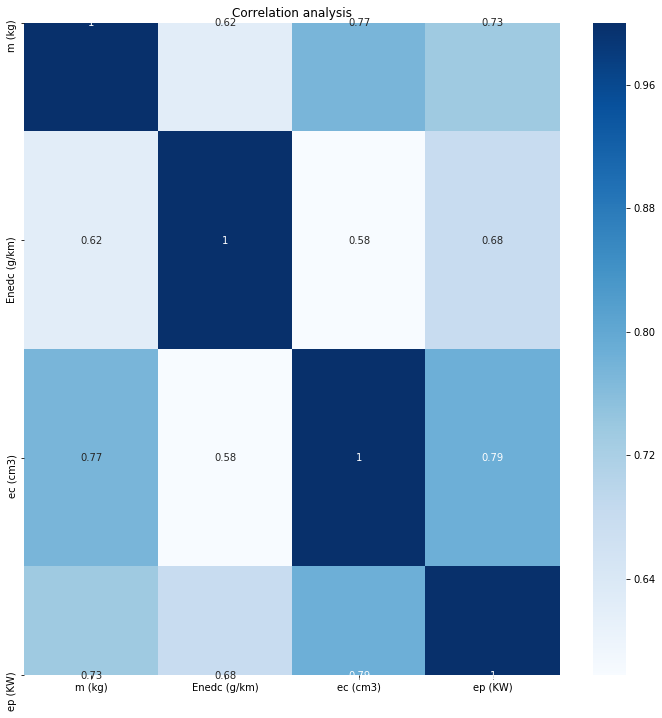

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[12, 12])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

**12** convert Ft into dummy variables

In [35]:
ft_dummy = pd.get_dummies(data['Ft'])
ft_dummy

,DIESEL,PETROL
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1048570,0,1
1048571,0,1
1048572,0,1
1048573,0,1




**13** add dummy variable to a new data set XY2

In [36]:
XY2 = pd.concat([XY[['Enedc (g/km)','m (kg)', 'ec (cm3)', 'ep (KW)']],ft_dummy], axis=1)

**14** create a Y vector and X matrix

In [45]:
Y2 = XY2['Enedc (g/km)']
X2 = XY2[['m (kg)', 'ec (cm3)', 'ep (KW)', 'DIESEL', 'PETROL']]



**15** create a regression model

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.4, random_state=50)


lm = LinearRegression()

lm.fit(x_train,y_train)

lm.coef_

lm.score(X2,Y2)

0.6740194614250204